# Customer Churn Prediction: Balancing Precision and Recall for Optimal Marketing Strategies

Customer churn is when a client stops doing business with an entity. Users can stop using a company’s product or service for a variety of reasons, such as affordability, dissatisfaction with the offering, and bad customer service.

More often than not, customers who churn from one company will start doing business with their competitor. For instance, you are likely to switch to an alternative if you aren’t happy with your current mobile service provider due to slow Internet speed.

Customer churn prediction is a crucial focus for businesses aiming to retain customers and allocate marketing resources effectively. By using predictive models, companies can anticipate which customers are likely to leave and respond with targeted retention efforts. However, achieving a balance between precision and recall in churn prediction is key for optimizing both retention strategies and marketing budget.

# Objectives
* We will build a customer churn prediction model in Python starting with random forests algorithm on the popular Telco dataset.
* We also will examine the model's performance based on our goal of predicting churns, thereby improving the model by employing other models.
* While achieving this, we will also make our model applicable in real-world scenerio and business practicality, by enhancing our model to balance the classification of False Positives(FP) and False Negatives(FN), to aid businesses minimize wastage of marketing effort on customers that won't churn and not miss a churn.
* We will also have different levels of classification for churners such as; high-risk, medium-risk and low-risk churners to enable
businesses know where to channel their efforts.

Lets get right into it!

### Data Overview

- **Source**: The dataset is sourced from the Telco Customer Churn dataset available on Kaggle.
- **Purpose**: The dataset is used to analyze customer churn and predict which customers are likely to discontinue their service, allowing businesses to implement retention strategies.
- **Size**: The dataset consists of **7,043** rows and **21** columns, representing various customer attributes and their service details.
- **Key Features**:
  - **customerID**: Unique identifier for each customer.
  - **gender**: Gender of the customer (Male/Female).
  - **SeniorCitizen**: Indicates if the customer is a senior citizen (1 for yes, 0 for no).
  - **Partner**: Indicates if the customer has a partner (Yes/No).
  - **Dependents**: Indicates if the customer has dependents (Yes/No).
  - **tenure**: Number of months the customer has stayed with the company.
  - **MonthlyCharges**: The amount charged to the customer monthly.
  - **TotalCharges**: The total amount charged to the customer.
  - **Contract**: Type of contract (Month-to-month, One year, Two year).
  - **Churn**: Indicates if the customer has churned (Yes/No).

- **Target Variable**: The target variable for the prediction task is **Churn**, which indicates whether a customer has left the service.


### Note on Raw Cells and Non-Selected Models

In this notebook, several model cells, such as Random Forest, XGBoost, and alternative stacking models, have been set to "raw". These models were evaluated during development but were not chosen as the final model due to performance comparisons. Only the selected **Stacking Model1** and supporting analyses are fully active in this notebook for clarity and focus on the final chosen approach.


In [224]:
import numpy as np
import random

# Set a seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [2]:
# Reviewing the Dataset

import pandas as pd
df = pd.read_csv('Downloads/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Output indicates no null values

In [5]:
# Let's count the number of customers that have churned(left) within the last month
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Output indicates that about 27% of customers have churned.
This means an imbalanced classified dataset, and we have to create a balanced training set before building the model


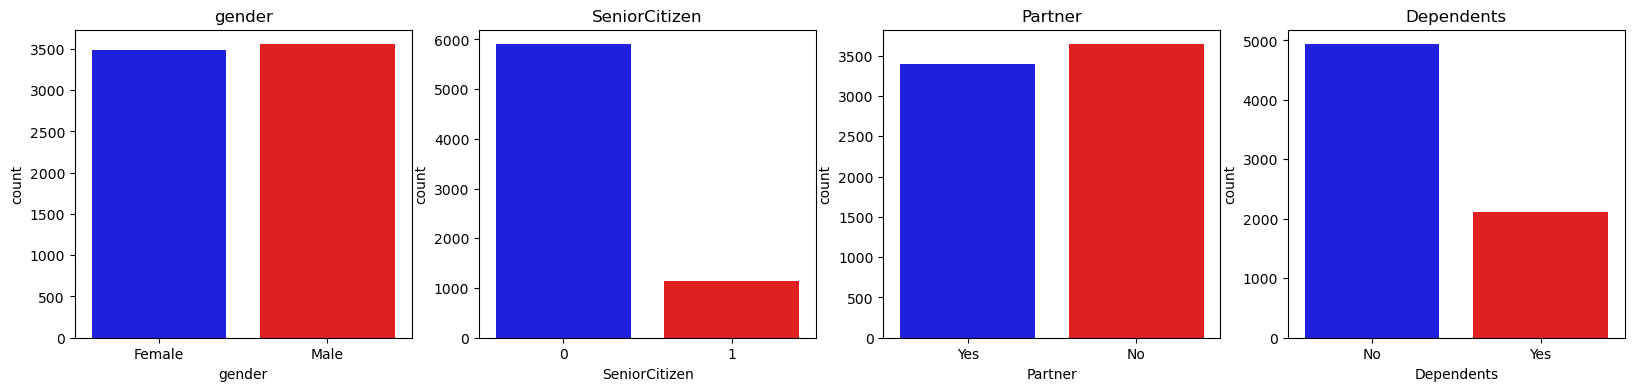

In [7]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

palette = ['blue', 'red']

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), hue=str(col), data=df, palette=palette, legend=False)
    ax.set_title(f"{col}") 


# Quick Overview of Plots
* Most customers are younger individuals with no dependents.
* Equal distribution between gender and marital status 

* One of the significant causes of churn is 'cost'. We will visualize the relationship between monthly cost and churn to understand how this affects churning


/var/folders/ql/9pqgmvgs3qq8hz11k1qprp0m0000gn/T/ipykernel_53683/3749306949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=palette, legend=False)


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

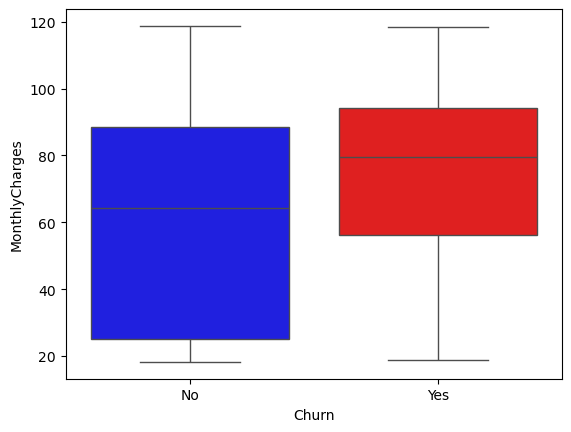

In [9]:
# Churn against MonthlyCharges

palette = ['blue', 'red']
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=palette, legend=False)

This plot satisfies the fact that customers with higher monthly sub fees were churned. This is a point to note for our model

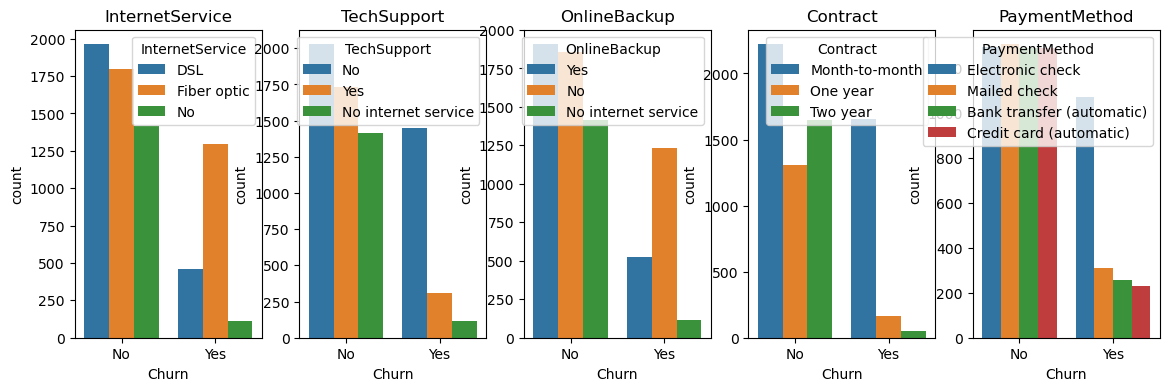

In [11]:
# More Visualizations of other categorical features against 'Churn' to see their relationship.

cols = ['InternetService',"TechSupport","OnlineBackup","Contract","PaymentMethod"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

# Plot Analysis
This plot helps to give more insight into why churning may occur.
* For InternetService, we can see more churns for fiber optics because of how expensive it can be. This makes common sense. 
* Users with no Tech-Support were churned due to the obvious fact that they did not receive any guidance on fixing technical issues and decided to stop using the service.
* Many customers who had churned did not sign up for an online backup service for data storage.
* The same goes for users with monthly subscription as this type of contract makes it easy to cancel.
* Payment Methods can also play a part in customer churning, as electronic check ranks high due to, convenience, security, speed and understanding the technology may influence churning.

A simple EDA can help companies understand why they are losing customers even without a ML model. These insights can help them 
take actionable steps.


In [13]:
# Prepocessing
# Change datatype of TotalCharges from Object to numeric

df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [14]:
# Encoding Categorical Variables

# We have to convert the cat.variables to numerical varibles before we can feed them to the ML model

cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1) # visualize the cat.columns by dropping the num.columns
cat_features.head()


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [15]:
# Encoding with num and Visualizing
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


All categorical features are now replaced with numbers, now we can merge with the numeric features dataframe. 


In [17]:
# Merge encoded cat.columns with num.column dataframe
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']] # observe that they are numerical columns
newdf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

In [18]:
# visualize new dataframe
newdf.head()

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,1840.75,42.30,0,45,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,151.65,70.70,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


Having the new df, we can now address the imbalanced dataset problem where only 27% of customers were churned,
as this can cause an underperforming ML model, which will end up predicting a single outcome. We will address this by oversampling technique


In [20]:
# splitting the dataset before oversampling
from sklearn.model_selection import train_test_split

newdf = newdf.dropna()
newdf = newdf.drop(['customerID'],axis=1)

X = newdf.drop(['Churn'],axis=1)
y = newdf['Churn']


In [21]:
# percentage allocation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42) # we allocate 32% test size to enable our model to learn well. We can tune this later

In [22]:
# Balancing the dataset using the over_sampling technique (SMOTE)
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [23]:
# check for equality of samples in each class
y_train.value_counts()

Churn
1    3504
0    3504
Name: count, dtype: int64

In [218]:
# Building the RandomForest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [220]:
# Checking for accuracy of Model
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7729897823189693


An accuracy of 77% indicates that our model is performing well.

In [222]:
# Further Analysis
# Generating the classification report

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

report = classification_report(y_test, preds)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1659
           1       0.57      0.58      0.57       592

    accuracy                           0.77      2251
   macro avg       0.71      0.71      0.71      2251
weighted avg       0.77      0.77      0.77      2251



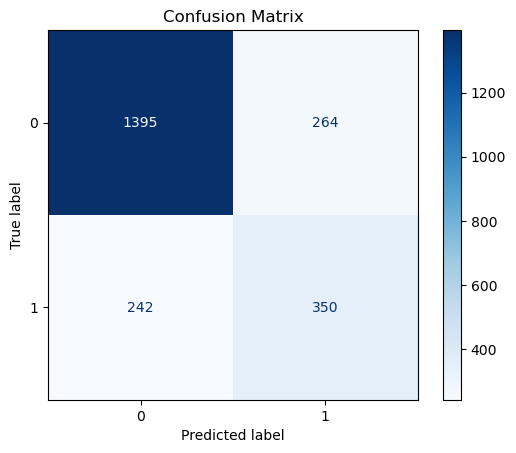

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Further analysis has shown that the lower precision and recall for class 1 (churn) suggests that the model maystruggle to accurately predict customers who are likely to churn. 

After the hyperparameter tuning, the best cross-validated score achieved was approximately 0.8224. Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [238]:
# Retrain the model with best parameters 

# Create a RandomForestClassifier with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=200,        # Best number of trees
    max_depth=10,            # Best maximum depth of the tree
    min_samples_split=2,     # Best minimum samples required to split an internal node
    min_samples_leaf=1,      # Best minimum samples required to be at a leaf node
    max_features='sqrt',     # Best number of features to consider for the best split
    random_state=42          
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the retrained Random Forest model: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy of the retrained Random Forest model: 0.7659
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1659
           1       0.54      0.68      0.60       592

    accuracy                           0.77      2251
   macro avg       0.71      0.74      0.72      2251
weighted avg       0.79      0.77      0.77      2251



Slightly improved accuracy but poor classification on class 1 which indicates that the weighted-class Rf may still struggle to classify actual positives

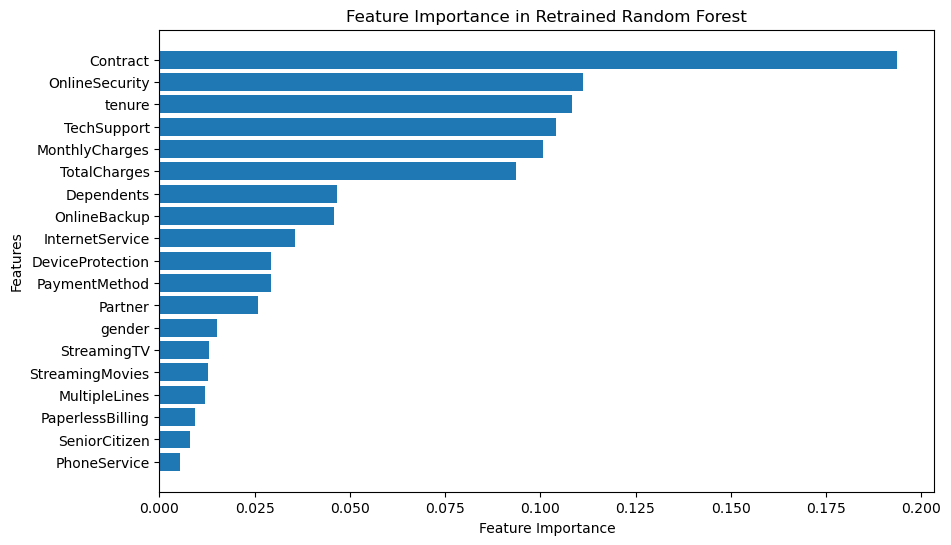

In [230]:
# Feature importance to determine which features contribute the most to predicting churn using our retrained model
# which have a fair balance between goal 1 and 2

import matplotlib.pyplot as plt
import numpy as np

# Fit the Random Forest model (using the same retrained model)
retrained_rf = best_rf_model  # best-retrained model from before

# Get feature importances
feature_importances = retrained_rf.feature_importances_
features = X.columns  # X contains the feature matrix

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Retrained Random Forest")
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Largest at the top
plt.show()


This retrained uses 'contract' as its most important feature for predicting churning, and this makes sense as it is easy for customers
on monthly contract to cancel. Refer back to our visualization for more insights.

# Implement XGBoost to Boost Model Perfomance

XGBoost Output is poorer compared to retrained RF
We are trying to achieve a better performing and applicable model, so we will enhance our model further.
We will implement Stacking, which can help combine the strengths of different models for better performance.

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# Define base models (Random Forest and XGBoost)
base_models = [
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
]

# Define the stacking model with Logistic Regression as the meta-model
stacking_model1 = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

# Train the stacking model
stacking_model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model1.predict(X_test)

# Evaluate the stacking model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Stacking model1: {accuracy:.4f}")
print("Classification Report for Stacking:")
print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:34:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:34:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:34:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:34:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Accuracy of the Stacking model1: 0.7725
Classification Report for Stacking:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1659
           1       0.56      0.60      0.58       592

    accuracy                           0.77      2251
   macro avg       0.71      0.72      0.71      2251
weighted avg       0.78      0.77      0.77      2251



# Models Results Evaluation and Selection with respect to the Objectives: 

From the outputs of all the models, **Stacking Model 1 (two base models with a Logistic Regression meta-model)** appears to be the best fit for threshold tuning and further evaluation which we will implement next. Here’s why:
* The model achieves a strong balance of precision (0.56) and recall (0.60) for churn (class 1), which aligns with our goal of reducing FP and FN errors.
* Its overall accuracy (77%) is slightly higher than other stacking models, making it a strong candidate for real-world application.

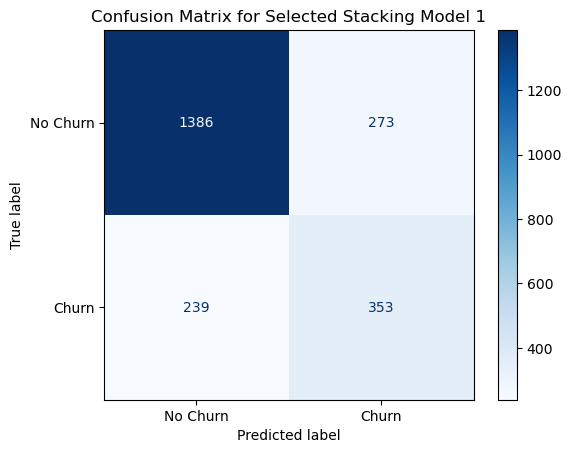

In [139]:
# Plot a confusion matrix of the selected model for more classification insight

y_pred = stacking_model1.predict(X_test)  # model's name

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Selected Stacking Model 1')
plt.show()

Our true positive values has improved compared to the former confusion matrix which is encouraging.
But having more false positves(273) may pose as a high cost of misclassification for organizations as it may be a waste of marketing efforts on customers that will not churn
In order to make a our model better, we will implement further tuning. 

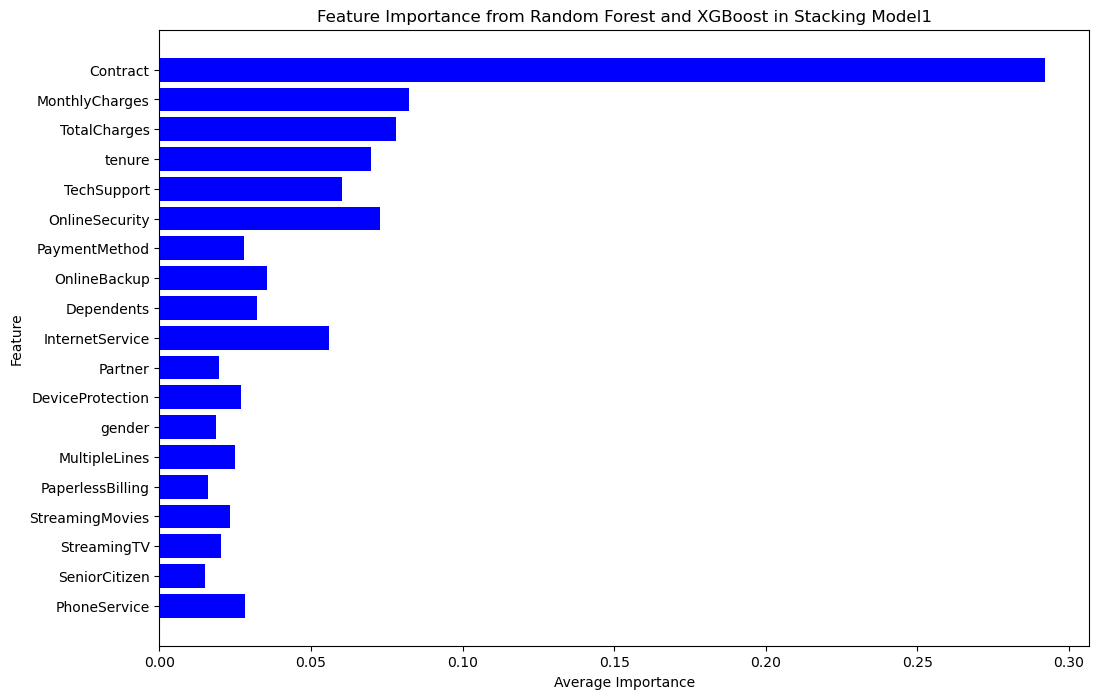

In [234]:
# Feature Importance of Selected Stacking Model 1

# Extract feature importances from Random Forest and XGBoost
rf_importances = stacking_model1.named_estimators_['rf'].feature_importances_
xgb_importances = stacking_model1.named_estimators_['xgb'].feature_importances_

# Get feature names
features = X_train.columns

# Create DataFrames for feature importances
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances})
xgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_importances})

# Sort by importance
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Combine the feature importances from both models for visualization
combined_importance_df = pd.merge(rf_importance_df, xgb_importance_df, on='Feature', suffixes=('_rf', '_xgb'))
combined_importance_df['Average_Importance'] = combined_importance_df[['Importance_rf', 'Importance_xgb']].mean(axis=1)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(combined_importance_df['Feature'], combined_importance_df['Average_Importance'], color='blue')
plt.title('Feature Importance from Random Forest and XGBoost in Stacking Model1')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Largest at the top
plt.show()

## Feature Importance Analysis

The feature importance analysis from our Stacking Model reveals that **contract type** is the most significant predictor of customer churn, followed closely by **monthly charges**, **total charges**, and **tenure**. This indicates that the structure of a customer's contract plays a crucial role in their likelihood to churn. Customers with specific contract types may have differing levels of satisfaction or loyalty, which could influence their decision to stay or leave.

The prominence of **monthly charges** and **total charges** suggests that pricing strategies and perceived value are vital factors in retaining customers, just like our visualization plots indicated. Higher monthly charges could correlate with a greater propensity to churn, especially if customers feel they are not receiving sufficient value in return. Additionally, **tenure** highlights the importance of customer loyalty and the relationship between the duration of service and churn risk.

These insights provide valuable guidance for targeted retention strategies. By focusing on customers with particular contract types and monitoring those with higher charges, businesses can develop tailored approaches to enhance customer satisfaction and reduce churn rates. Implementing proactive measures based on these findings can lead to improved customer retention and overall business performance.


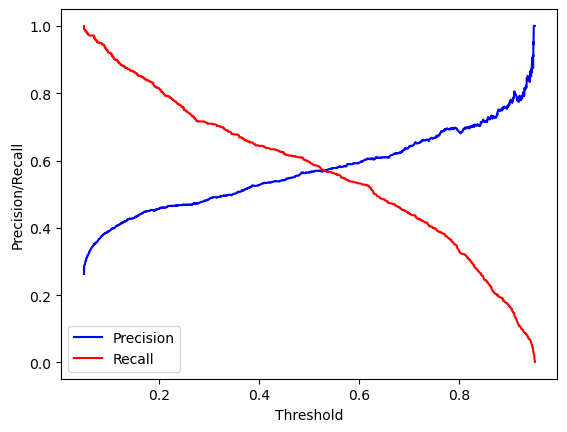

In [143]:
# Threshold Tuning for better business outcomes
# This will allow us to shift the prediction threshold to control FP and FN rates more closely, aligning the model's behavior with business needs..

from sklearn.metrics import precision_recall_curve, classification_report

# Predict probabilities for the positive class (churn)
y_prob = stacking_model1.predict_proba(X_test)[:, 1]

# Generate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall to visualize the threshold effect
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'r-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend(loc='best')
plt.show()

Our plot indicates a good trade-off at point 0.56 as this represents our Elbow point.

In [212]:
# Adjust threshold manually (set it to 0.56)
# Set the optimal threshold based on business needs (threshold of 0.56)
optimal_threshold = 0.56
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate performance with the new threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1659
           1       0.58      0.56      0.57       592

    accuracy                           0.78      2251
   macro avg       0.71      0.71      0.71      2251
weighted avg       0.77      0.78      0.78      2251



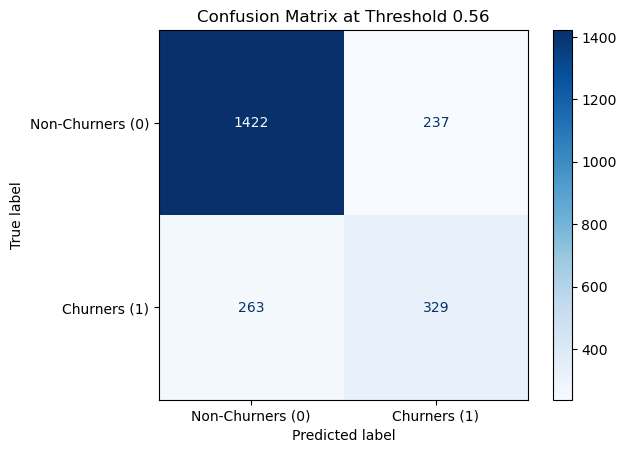

In [159]:
# Confusion matrix


# Set threshold to 0.56 to make predictions
threshold = 0.56
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churners (0)', 'Churners (1)'])
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix at Threshold 0.56')
plt.show()


In [163]:
# Define thresholds for high and medium risk segments
from collections import Counter

# Define thresholds based on our elbow point
high_risk_threshold = 0.70
medium_risk_threshold = 0.56

# Segment customers based on their churn probabilities
y_prob = stacking_model1.predict_proba(X_test)[:, 1]
risk_segment = ["High Risk" if prob >= high_risk_threshold else
                "Medium Risk" if prob >= medium_risk_threshold else "Low Risk"
                for prob in y_prob]

# Count each segment to understand the distribution
risk_distribution = Counter(risk_segment)

# Print the segment distribution in the specified format
print("High Risk -", risk_distribution["High Risk"])
print("Medium Risk -", risk_distribution["Medium Risk"])
print("Low Risk -", risk_distribution["Low Risk"])

High Risk - 411
Medium Risk - 155
Low Risk - 1685


This stratification allows for more focus on retention efforts on the most at-risk customers (high-risk group), 
ensuring that business resources are used efficiently while still monitoring medium-risk customers. 
This makes our model more business-practical.

* **High-Risk Churners:**  411 - These are customers who are very likely to churn based on the model. 
Highest priority for intervention—offering promotions, discounts, or personalized retention strategies.

* **Medium-Risk Churners:**  155 - These customers show some risk of churning but are less certain than high-risk churners. 
Engaging with these customers through loyalty programs or special incentives could help reduce the likelihood of churn.

* **Low-Risk Churners:**  1685 - These are the customers predicted to remain loyal for the time being. 
No immediate intervention needed, but continous engagement with regular communication and offers to maintain loyalty. 

# Business Implications

The developed customer churn prediction model provides significant strategic advantages for businesses:

1. **Targeted Marketing Efforts**: By accurately identifying high-risk customers, businesses can focus their retention strategies and marketing efforts on those most likely to churn, optimizing resource allocation and reducing wasted marketing spend.

2. **Enhanced Customer Engagement**: Understanding customer segments allows for tailored communication and engagement strategies, fostering loyalty and improving customer satisfaction, ultimately leading to higher retention rates.

3. **Proactive Interventions**: The model enables proactive measures by alerting businesses to potential churn risks. Early interventions, such as personalized offers or customer service outreach, can mitigate churn and improve overall customer lifetime value.

4. **Data-Driven Decision Making**: Leveraging data insights empowers businesses to make informed decisions regarding product offerings, pricing strategies, and customer support initiatives, enhancing competitiveness in the market.

5. **Long-Term Profitability**: By effectively reducing churn rates through targeted strategies, businesses can significantly improve their profitability and ensure sustainable growth in a competitive landscape.


# Conclusion

Overall, the project successfully achieved its goals:

1. **Predicting Customer Churn**: The models demonstrated a solid ability to predict customer churn, evidenced by the accuracy and recall metrics.
2. **Balancing False Positives and False Negatives**: Analysis of precision and recall emphasized the importance of minimizing both false positives and false negatives.
3. **Real-World Applicability**: The segmentation of customers into high, medium, and low-risk categories provides a practical framework for businesses.
4. **Comprehensive Analysis**: Thorough evaluations using classification reports, confusion matrices, and threshold tuning demonstrated a well-rounded understanding of model performance.

This project not only meets its objectives but also lays a solid foundation for further enhancements and practical applications in a business context.


# Appendix

## Additional Models

### Random Forest
- Accuracy: 0.775
- Precision: 0.85 for class 0, 0.57 for class 1

### XGBoost
- Accuracy: 0.761
- Precision: 0.85 for class 0, 0.54 for class 1

### Stacking Model 1
- Accuracy: 0.7725
- Precision: 0.85 for class 0, 0.56 for class 1

### Stacking Model 2
- Accuracy: 0.7597
- Precision: 0.85 for class 0, 0.54 for class 1

### Stacking Model 3
- Accuracy: 0.7628
- Precision: 0.85 for class 0, 0.55 for class 1
  
## Feature Importance

### Random Forest Model
- The most significant feature influencing customer churn was **Monthly Charge**. This suggests that higher monthly fees could lead to increased churn rates, highlighting the need for pricing strategies to retain customers.

### Stacking Model 1
- In contrast, the **Contract Type** emerged as the most important feature in the Stacking Model 1. This indicates that the type of contract a customer is on plays a crucial role in their likelihood to churn, suggesting that customers on short-term contracts may be more likely to leave than those on longer commitments.

## Threshold Selection
- Thresholds were set based on the elbow point identified during the analysis: 
  - High Risk: 0.70
  - Medium Risk: 0.56

## Confusion Matrices
- Confusion Matrix at Threshold 0.56:


## Additional Insights
- The analysis highlighted that **Contract Type** significantly impacts a customer's likelihood to churn, as identified by the best-performing model, **Stacking Model 1**. This suggests that customers on shorter contracts (e.g., month-to-month) are more likely to leave compared to those on long-term contracts. Consequently, focusing on strategies to convert month-to-month customers to longer-term contracts could be an effective retention approach.
